In [1]:
import scipy.stats as stat
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
from sklearn import metrics

### Генерируем выборку

In [2]:
N = 500
disp = 0.2

xs = np.linspace(0, 50, N)
ys = xs * 0.5 + 1 + stat.norm.rvs(size=N, scale=disp**0.5)

### Вывод точек

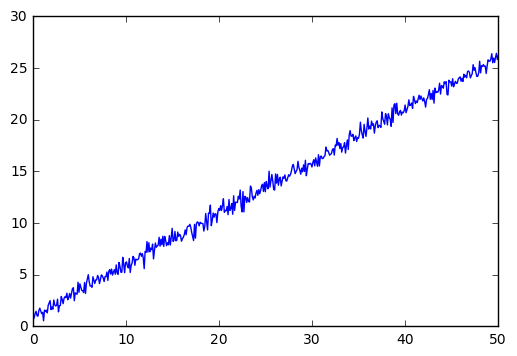

In [3]:
plt.plot(xs, ys)
plt.show()

### Восстановим прямую по точкам минимизируя MSE

In [4]:
res = optimize.minimize(lambda params: metrics.mean_squared_error(params[0] * xs + params[1], ys), (1, 1))
params = res.x

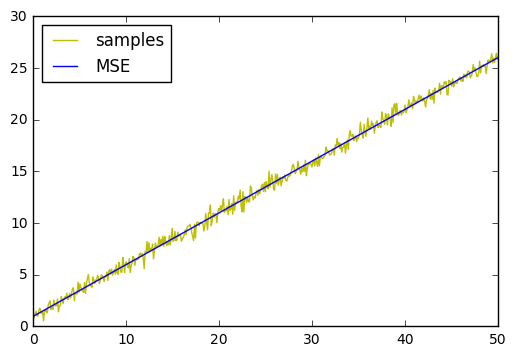

In [5]:
plt.plot(xs, ys, color='y')
plt.plot(xs, xs * params[0] + params[1], color='b')
plt.legend(['samples', 'MSE'], loc=2)
plt.show()

### Добавляем шум 

In [6]:
n_noise = 75

xs_noise = np.linspace(0, 50, n_noise)
ys_noise = -1 + stat.norm.rvs(size=n_noise, scale=disp**0.5, loc=-1.0)

xs = np.concatenate([xs, xs_noise])
ys = np.concatenate([ys, ys_noise])

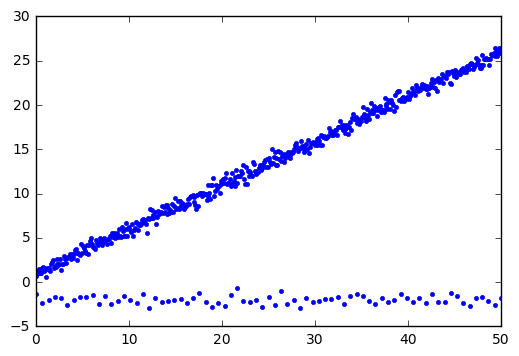

In [7]:
plt.plot(xs, ys, 'b.')
plt.show()

### MSE & MAE

In [11]:
res = optimize.minimize(lambda params: metrics.mean_squared_error(params[0] * xs + params[1], ys), (1, 1))
MSE = res.x

res = optimize.minimize(lambda params: metrics.mean_absolute_error(params[0] * xs + params[1], ys), (1, 1))
MAE = res.x

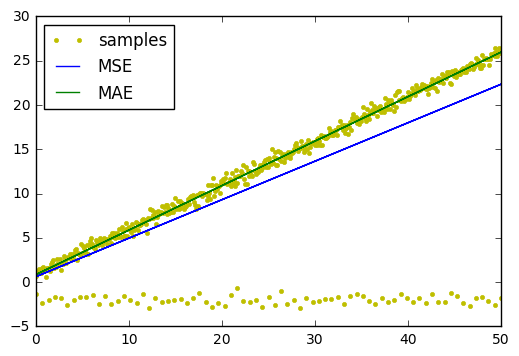

In [12]:
plt.plot(xs, ys, 'y.')
plt.plot(xs, xs * MSE[0] + MSE[1], color='b')
plt.plot(xs, xs * MAE[0] + MAE[1], color='g')
plt.legend(['samples', 'MSE', 'MAE'], loc=2)
plt.show()

Вывод: MAE показала себя лучше к выбросам чем MSE